### SQL Basics

In [36]:
import pandas as pd
import numpy as np
import random
import collections
import time
import re

In [2]:
ios_versions = [
                '9.3.5', 
                '9.3.6',
                '10.3.3',
                '10.3.4',
                '12.5.5',
                '14.8.1',
                '15.3.1',
                '15.4'
                ]

android_versions = [
                '4.3.1', 
                '4.4',
                '4.4.4',
                '5.0',
                '5.1.1',
                '6.0',
                '6.0.1',
                '7.0',
                '7.1.2',
                '8.0',
                '8.1',
                '9',
                '11',
                '12'
                ]


In [4]:
random.seed(10)
mobile_os = ["android", "ios"]
distribution = [.75, .25]

random_number = random.choices(mobile_os , distribution)

print(random_number)

['android']


In [5]:
random.seed(10)
# pd.DataFrame( data  = random.choices(mobile_os , distribution, k = 10000),
#                 columns = ['x']).value_counts()
mobile_list = random.choices(mobile_os , distribution, k = 10000)

db_data = [ (i, w, random.choice(ios_versions) ) if w == 'ios' else
  (i,w, random.choice(android_versions)  ) for i,w in enumerate(mobile_list)]

### Create and populate table with OS Versions
```sql
CREATE TABLE IF NOT EXISTS os_versions(
                      user_id integer, 
                      mobile_os text, 
                      mobile_version text ) ;
```

In [49]:
# CREATING THE TABLE: OS versions 
import sqlite3
conn = sqlite3.connect('test.db')

conn.execute('''
CREATE TABLE IF NOT EXISTS os_versions(
                      user_id integer, 
                      mobile_os text, 
                      mobile_version ) ;
             ''')

conn.commit()
conn.close()

# Inserting prepared values 
conn = sqlite3.connect('test.db')

for i in range(len(db_data)):
    conn.execute('INSERT INTO os_versions VALUES' + str(db_data[i]))

conn.execute("INSERT INTO os_versions VALUES(10000, 'ios', 'Sierra')" )
conn.execute("INSERT INTO os_versions VALUES(10001, 'ios', 'Snow Cone')" )
conn.execute("INSERT INTO os_versions VALUES(10002, 'ios', NULL)" )
conn.execute("INSERT INTO os_versions VALUES(10003, 'android', NULL)" )


conn.commit()


### Example of 1 row from os_versions_table

In [50]:
sql = ''' SELECT * from os_versions limit 1; '''               
# example 
conn = sqlite3.connect('test.db')
c = conn.cursor()

c.execute(sql)
df = pd.DataFrame(c.fetchall(), 
                  columns = [desc[0] for desc in c.description]
                 )
conn.close()

In [52]:
df

,id,mobile_os,mobile_version
0,0,android,4.4


### SQL

### Task1: 
- Написать SQL скрипт: <br>
  отобрать версии выше чем 10.1 и ниже чем 9.2 <br>
  посчитать кол-во пользователей на каждой версии с учетом операционной системы ios/android <br>
  отсортировать рез-т по операционной системе( сначала IOS ) и по версии от старой к новой <br> 
- Запустить исполнение ниже и получить DataFrame

### Questions1:
- Как можно улучшить хранение данных с точки зрения типов ( ddl выше )? 


In [92]:
def reg_replace(s):
    if s is not None:
        w = re.sub('[\d\.]', '', s)
    else:
        w = None
    return w 
        
def str_split(s,sep,num):
    return s.split('.')[num-1]
    
sql = '''
        select mobile_os, mobile_version, count(1) as c 
        from (
        select t.*, 
        cast( str_split(coalesce(mobile_version,'') || '.0','.',1) as int ) as p1,
        cast( str_split(coalesce(mobile_version,'') || '.0','.',2) as int ) as p2
        from (
            select * from  
            os_versions
            where 
            length( reg_replace(coalesce(mobile_version,'') || '' ) ) = 0  
            ) t
            ) t 
        where ( ( p1 = 10 and p2 > 1 ) or p1 > 10 )
                or ( ( p1 = 9 and p2 < 2 ) or p1 between 1 and 8 )
        group by mobile_os, mobile_version
        order by mobile_os desc, p1, mobile_version ;
    '''              
# example 
conn = sqlite3.connect('test.db')
c = conn.cursor()

conn.create_function("reg_replace", 1, reg_replace)
conn.create_function("str_split", 3, str_split)

c.execute(sql)
df = pd.DataFrame(c.fetchall(), 
                  columns = [desc[0] for desc in c.description]
                 )
conn.close()

In [95]:
df

,mobile_os,mobile_version,c
0,ios,10.3.3,1104
1,ios,10.3.4,1180
2,ios,12.5.5,1272
3,ios,14.8.1,1216
4,ios,15.3.1,1264
5,ios,15.4,1284
6,android,4.3.1,2304
7,android,4.4,2096
8,android,4.4.4,2296
9,android,5.0,2188


### Python programming

### Task1: 
- Полученный из SQL DataFrame преобразовать в dict  ключом вида tuple (mobile_os,mobile_version ) и значением с 
- reverse string написать ф-цию. Big O notation оценить сложность?
### Questions:
- Как посмотреть тип объекта ? 
- Какие итераторы есть у словаря ( dict )/ какой используется по дефолту ?

In [106]:
version_dict = dict(
    zip(
    [(x,y) for x,y in zip(df['mobile_os'].values,df['mobile_version'].values)],
    df['c'].values
    )
)

### Stats
### Tasks
- Рассказать ключевые параметры Bivariate Normal Distribution на примере ниже

### Questions
- (*) Что означает cov(X1,X2) = 0 в данном случае. Независимы ли X1 и X2?
- Что означает, что случайные величины X1 и X2 независимы ?
- Написать формулу Байеса для случая бинарные классификации. Как определить Байесовское правило для принятия решения по точке (x1,x2 ) ?

(-2.737203636443793, 4.436844863719486, -3.4337441387295247, 2.882122214893548)

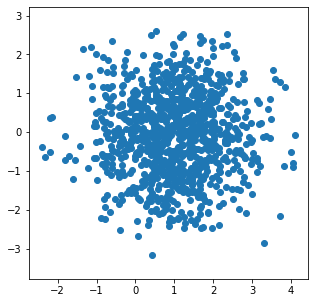

In [198]:
X = np.random.multivariate_normal(mean = [1,0], cov = [[1,0],[0,1]], size = 1000)
fig, ax = plt.subplots( 1,1, figsize = (5,5))
plt.scatter(X[:,0],X[:,1],)
ax.axis('equal')

In [202]:
Y = []
X = []
for i in range(100):
    X.append(np.random.multivariate_normal([1,0], [[1,0],[0,1]]))
    Y.append(0)

for i in range(100):
    X.append(np.random.multivariate_normal([0,1], [[1,0],[0,1]]))
    Y.append(1)

X = np.vstack(X)
target = np.array(Y,ndmin = 2).T

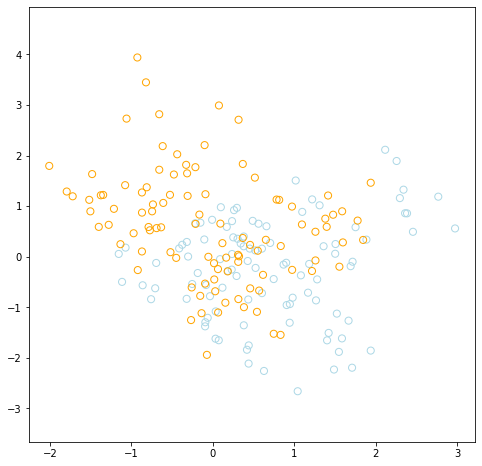

In [203]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x_input[:,0],x_input[:,1], 
           facecolors='None',
            edgecolors = ['#ADD8E6' if y == 0 else '#FFA500' for y in target], 
           marker ='o' , s = 50)
ax.set_ylim((-1+min(x_input[:,1]), 1+max(x_input[:,1])))
plt.show()